<a href="https://colab.research.google.com/github/SergioFCampos/Campos-Research/blob/master/Rio_de_Janeiro_airbnbSergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Airbnb Rio de Janeiro


### Contexto 

A AirBnB é uma empresa gigante que oferece hospedagem para milhões de pessoas ao redor do mundo. O detalhe é que , como todos sabem, a empresa não possui nenhum hotel ,nem pousadas .

"A missão da AirBnB fundamenta-se na ideia de que as pessoas são essencialmente boas e que uma comunidade é um lugar onde você possa se sentir em casa."
*Parte da missão por Brian Chesky -CEO e cofundador do Airbnb*



###Obtenção de Dados

Os dados usados aqui são reais e foram obtidos a partir do site Inside Airbnb.

O arquivo utilizado foi um resumo de dados considerando o Rio de Janeiro.



**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
*   name - nome da propriedade anunciada
*   host_id - número de id do proprietário (anfitrião) da propriedade
*   host_name - Nome do anfitrião
*   neighbourhood_group - esta coluna não contém nenhum valor válido
*   neighbourhood - nome do bairro
*   latitude - coordenada da latitude da propriedade
*  longitude - coordenada da longitude da propriedade 
*   room_type - informa o tipo de quarto que é oferecido
*   price - preço para alugar o imóvel
*   minimum_nights - quantidade mínima de noites para reservar
*   number_of_reviews - número de reviews que a propriedade possui
*   last_review - data do último review
*   reviews_per_month - quantidade de reviews por mês
*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
*   availability_365 - número de dias de disponibilidade dentro de 365 dias

















Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

Os dados levantados são referentes ao período dos ultimos 6 meses cosiderando a data de 20 de maior de 2020.



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


## 1- Análise dos Dados Encontrados 
**Quantas Entradas? (volume de dados)- Quantas Variáveis? (tipo de dados**)

In [9]:

#imprimir tipo de variavel e volume /quantidade
print("Entradas:\t {}".format(df.shape[0]))
print("Variaveis:\t {} \n".format(df.shape[1]))

Entradas:	 35870
Variaveis:	 16 



In [10]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##2- Qual a porcentagem de valores ausentes no DF(dataFrame)

In [11]:
df.isnull().sum()

id                                    0
name                                 58
host_id                               0
host_name                             5
neighbourhood_group               35870
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       14766
reviews_per_month                 14766
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

##3-Distribuição de variaveis - Histograma

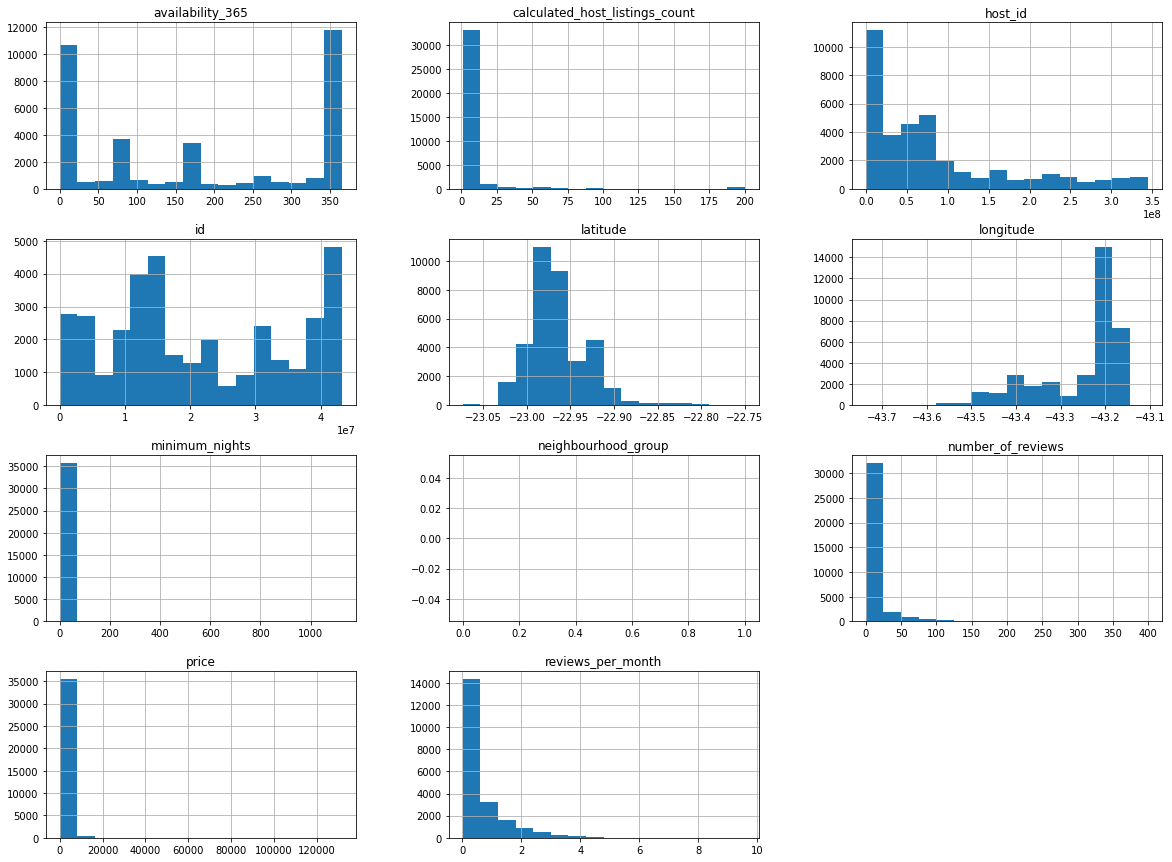

In [13]:
df.hist(bins=16,figsize=(20,15));

##4- Existem Outliers?

Importante especificar quais variaveis consideramos para fazer sentido

In [0]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.587000e+04,3.587000e+04,0.0,35870.000000,35870.000000,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,2.126134e+07,8.464870e+07,NaN,-22.965205,-43.251998,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,1.362578e+07,8.898633e+07,NaN,0.034922,0.096803,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,1.787800e+04,1.173900e+04,NaN,-23.073400,-43.737090,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.099704e+07,1.506266e+07,NaN,-22.984550,-43.318668,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,1.707419e+07,5.640307e+07,NaN,-22.970730,-43.198660,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,3.412351e+07,1.111400e+08,NaN,-22.947360,-43.186580,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,4.322784e+07,3.441701e+08,NaN,-22.750380,-43.104620,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


In [0]:
df[["price","minimum_nights","availability_365","calculated_host_listings_count","number_of_reviews","reviews_per_month"]].describe()

,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,reviews_per_month
count,35870.000000,35870.000000,35870.000000,35870.000000,35870.000000,21104.000000
mean,753.686367,4.781851,180.371815,6.613995,9.822972,0.652248
std,2229.366334,22.471085,152.510778,22.769663,25.827647,0.823388
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.010000
25%,158.000000,1.000000,0.000000,1.000000,0.000000,0.130000
50%,298.000000,2.000000,178.000000,1.000000,1.000000,0.340000
75%,632.000000,4.000000,363.000000,3.000000,6.000000,0.830000
max,131727.000000,1123.000000,365.000000,200.000000,399.000000,9.570000


##A média do preço de aluguel é de 754 reais

## Comprovações 
**Preço**

o valor maximo do preço de aluguelpor dia é de 131.727, muito alto.

Considerando que 75% dos imoveis são alugados por menos de 632- algo errado

**Minimo de noites**

A média de noites que alguem aluga é de 4.8 noites
Portanto um máximo de 1.123 noites , deve estar errado

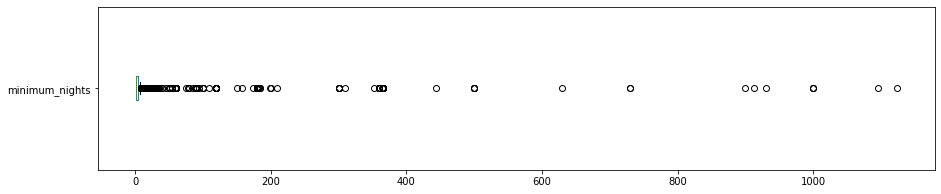

In [0]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [0]:
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30:
224 entradas
0.6245%


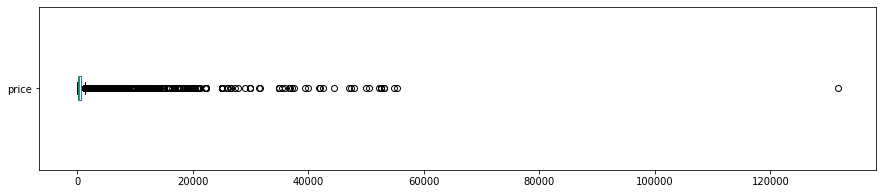

In [0]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [0]:
print("Preço: valores acima de 2000:")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

Preço: valores acima de 2000:
2176 entradas
6.0664%


Como tirar os Outliers? Histograma sem Outliers

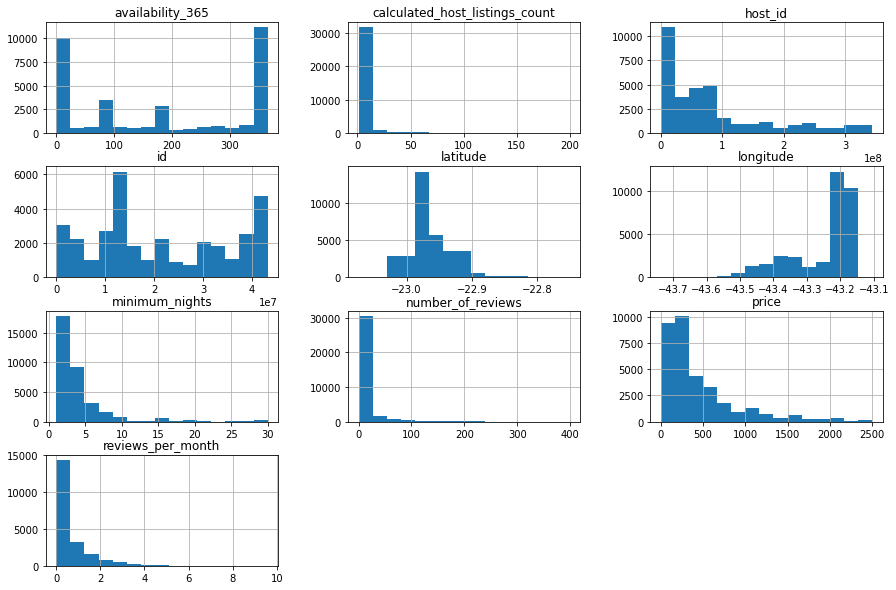

In [14]:
# remover os *outliers* 
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

##5- Correlação entre variaveis

Correlação representa a inluencia de uma variavel em relação a outra, se as duas coisas estão relacionadas de alguma forma e com que intensidade.

Matriz - Indices de correlação

HeatMap

In [15]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.183554,-0.163838,-0.162360,0.029056,-0.024110
minimum_nights,0.183554,1.000000,-0.066531,-0.082547,-0.035205,-0.023334
number_of_reviews,-0.163838,-0.066531,1.000000,0.646251,-0.024952,0.051965
reviews_per_month,-0.162360,-0.082547,0.646251,1.000000,-0.017001,-0.020999
calculated_host_listings_count,0.029056,-0.035205,-0.024952,-0.017001,1.000000,0.075258
availability_365,-0.024110,-0.023334,0.051965,-0.020999,0.075258,1.000000


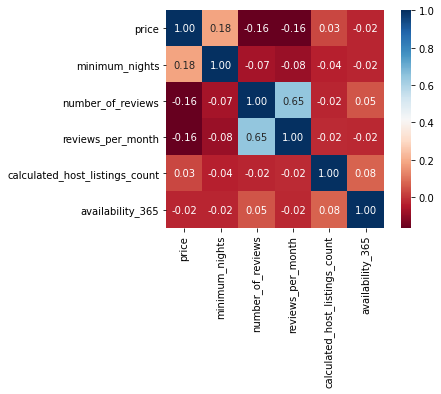

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


##6- Qual o tipo de imovel mais alugado?

A denominação room_type é o tipo de imovel a ser alugado que está anunciado no Airbnb.

Pode-se alugar apartamentos/casas inteiras,  quartos exclusivos e até quartos compartilhados

vamos contar?

In [0]:
df_clean.room_type.value_counts()

Entire home/apt    24012
Private room        9068
Shared room          771
Hotel room           160
Name: room_type, dtype: int64

In [0]:

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.706007
Private room       0.266620
Shared room        0.022669
Hotel room         0.004704
Name: room_type, dtype: float64

##7- Localidade mais cara

In [16]:
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Vaz Lobo                    875.666667
Ricardo de Albuquerque      834.166667
Engenheiro Leal             800.000000
Joá                         786.118644
Anchieta                    745.333333
Vicente de Carvalho         691.555556
Alto da Boa Vista           658.116279
Lagoa                       630.234463
Magalhães Bastos            605.500000
Barra da Tijuca             604.467877
São Conrado                 594.230769
Leblon                      587.421296
Maracanã                    584.297872
Jacarepaguá                 583.748595
Itanhangá                   572.506757
Recreio dos Bandeirantes    562.710874
Vargem Grande               561.267241
Benfica                     546.000000
Ipanema                     545.051575
Engenho de Dentro           543.118421
Name: price, dtype: float64

In [0]:
#quantos imoveis tem em VazLobo

In [0]:
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2908,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1000,1,0,NaN,NaN,1,0
15776,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1329,15,0,NaN,NaN,1,365
33803,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,298,1,0,NaN,NaN,1,362


In [0]:
df_clean[df_clean.neighbourhood == "Barra da Tijuca"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
33,86978,Room For a Rent : Rio de Janeiro,476838,Antonio,Barra da Tijuca,-22.97352,-43.38242,Private room,798,1,0,NaN,NaN,1,365
46,96431,Amazing ocean view !,511850,Marina E Ernani,Barra da Tijuca,-23.01159,-43.36925,Entire home/apt,229,4,41,2020-03-22,0.48,2,327
53,106372,Reveillon & Natal na Barra da Tijuca. Rj,551316,Katia,Barra da Tijuca,-23.00890,-43.43049,Entire home/apt,358,4,7,2020-02-26,0.16,1,358
103,192548,Ampla Suíte - 100m da Praia Pepê/Barra da Tijuca,932671,Ricardo,Barra da Tijuca,-23.01283,-43.31187,Private room,548,2,1,2016-08-20,0.02,2,0
142,249616,Flat at Barra Near by WINDSOR HOTEL,1307761,Malí,Barra da Tijuca,-23.01129,-43.32305,Entire home/apt,197,3,220,2020-04-20,2.17,2,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35713,43198921,Sunshine Great Ocean View,317446019,Zeus,Barra da Tijuca,-23.01106,-43.36360,Entire home/apt,197,2,0,NaN,NaN,2,254
35857,43213898,Barra Premium CaviRio – Flat Barra da Tijuca (...,66039372,Vitor & Carlos,Barra da Tijuca,-23.00144,-43.39308,Private room,106,1,0,NaN,NaN,65,341
35861,43215421,Promenade Barra Flat 3,328184238,Jefferson,Barra da Tijuca,-23.00486,-43.31915,Entire home/apt,374,1,0,NaN,NaN,3,364
35862,43215423,Promenade Flat Barra 2,328184238,Jefferson,Barra da Tijuca,-23.00645,-43.31971,Entire home/apt,390,1,0,NaN,NaN,3,361


In [0]:
df_clean[df_clean.neighbourhood == "Ricardo de Albuquerque"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3945,3106028,Rent home for World Cup season,14962884,Gilcéa,Ricardo de Albuquerque,-22.83446,-43.38553,Private room,1000,1,0,NaN,NaN,1,365
10259,12085875,Rent 2016 Olympics Deodoro,64528820,Lucimar,Ricardo de Albuquerque,-22.83996,-43.39992,Entire home/apt,1999,1,0,NaN,NaN,1,90
14220,13927176,Rent for the 2016 Olympics,81890830,Luiz,Ricardo de Albuquerque,-22.83942,-43.40542,Entire home/apt,1063,1,0,NaN,NaN,1,89
15898,14251471,House for Olympics near Complex Deodoro,86752448,Rafael,Ricardo de Albuquerque,-22.83933,-43.39691,Entire home/apt,523,6,0,NaN,NaN,1,0
16244,14382360,PARQUE OLIMPICO DE DEODORO- FAMILIAR,88303678,Olimpia Catarina De,Ricardo de Albuquerque,-22.84187,-43.40335,Private room,298,1,0,NaN,NaN,1,365
34639,42329773,Quitinete independente para casal ou +,330224882,Josue,Ricardo de Albuquerque,-22.83918,-43.39641,Entire home/apt,122,3,0,NaN,NaN,4,180


In [0]:
df_clean[df_clean.neighbourhood == "Engenheiro Leal"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22589,26996243,Engenheiro Leal Casa,159787826,Antonio,Engenheiro Leal,-22.87497,-43.32121,Entire home/apt,1499,15,0,NaN,NaN,2,365
34840,42403931,Quarto em Cascadura,336310280,Rodrigo,Engenheiro Leal,-22.87728,-43.32327,Private room,101,1,0,NaN,NaN,1,90


In [0]:
df_clean["neighbourhood"].value_counts()[:20]

Copacabana                  9101
Barra da Tijuca             3580
Ipanema                     2889
Jacarepaguá                 1957
Botafogo                    1727
Recreio dos Bandeirantes    1591
Leblon                      1512
Santa Teresa                1120
Centro                       975
Flamengo                     868
Tijuca                       699
Laranjeiras                  696
Leme                         608
Lagoa                        354
Glória                       344
Catete                       332
Camorim                      297
Humaitá                      295
Jardim Botânico              287
Maracanã                     282
Name: neighbourhood, dtype: int64

In [0]:
(df_clean["neighbourhood"].value_counts() / df_clean.shape[0]).sort_values(ascending=False)[:20]

Copacabana                  0.267590
Barra da Tijuca             0.105260
Ipanema                     0.084943
Jacarepaguá                 0.057540
Botafogo                    0.050778
Recreio dos Bandeirantes    0.046779
Leblon                      0.044456
Santa Teresa                0.032931
Centro                      0.028667
Flamengo                    0.025521
Tijuca                      0.020552
Laranjeiras                 0.020464
Leme                        0.017877
Lagoa                       0.010408
Glória                      0.010114
Catete                      0.009762
Camorim                     0.008732
Humaitá                     0.008674
Jardim Botânico             0.008438
Maracanã                    0.008291
Name: neighbourhood, dtype: float64

Vamos ver o visual dos imoveis disponiveis AirBnB no Rio de Janeiro

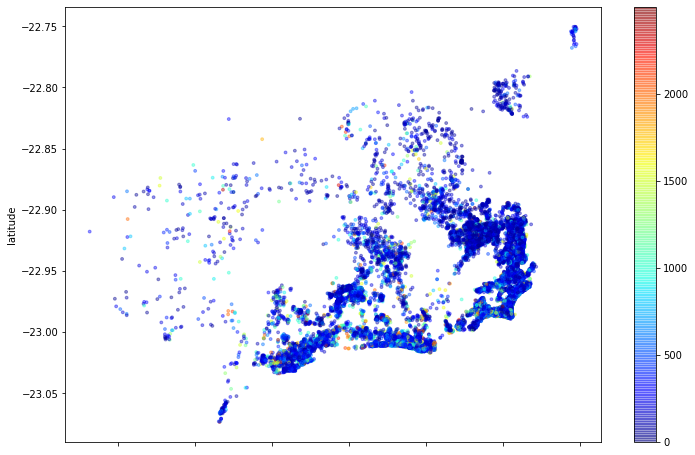

In [0]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8))

#Conclusões

Identificamos que os bairros de Vaz Lobo , Ricardo de Albuquerque e Engenheiro Leal são as localidades mais caras, em média.

Porem a quantidade de imoveis disponiveis nessas localidades são muito pequenas, não chegando nem proximo de 1%.

Por serem poucas unidades , se existir algum preço distorcido muito para cima, a média nas localidades fica equivocada.

Só para os termos de comparação :

Localidade com maior numero de imoveis disponiveis - Copacabana-9.101 imoveis
20 lugar o bairro do Maracanã tem 282 imoveis disponiveis

Copacabana - 9.101 / 282 = 32 vezes aproximadamente

Numero de imoveis disponíveis em:

Vaz Lobo - 03

Ricardo de Albuquerque - 06

Engenheiro Leal - 02


Os bairros com média mais alta de aluguel não necessariamente são os bairros melhores para se hospedar.